<a href="https://colab.research.google.com/github/mahaairshad/CE888_si19783/blob/master/FBCSP/FBCSP_unsimplified_with_mne_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PyDrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1-GmBB-nwfaKqDaymIjJfS5HZVxS97be8'})
download.GetContentFile('DOWNLOAD.rar')
download2 = drive.CreateFile({'id': '1uMebPOcHoeDgAFCCL3agmPnYA9PU9zRw'})
download2.GetContentFile('sample_neuromag.rar')

In [6]:
!pip install patool
import patoolib
patoolib.extract_archive("DOWNLOAD.rar")
patoolib.extract_archive("sample_neuromag.rar")

     |████████████████████████████████| 81kB 2.6MB/s 
patool: Extracting DOWNLOAD.rar ...
patool: running /usr/bin/unrar x -- /content/DOWNLOAD.rar
patool:     with cwd='./Unpack_ah27chvj'
patool: ... DOWNLOAD.rar extracted to `Data_sample'.
patool: Extracting sample_neuromag.rar ...
patool: running /usr/bin/unrar x -- /content/sample_neuromag.rar
patool:     with cwd='./Unpack_wcmot1w1'
patool: ... sample_neuromag.rar extracted to `data'.


'data'

In [7]:
!pip install mne --upgrade
import mne

     |████████████████████████████████| 6.4MB 2.8MB/s 


In [0]:
from scipy.io import loadmat
import numpy as np
import pandas as pd

In [0]:
fname='Data_sample/ParsedMEGData_P1.mat'
annotsS1 = loadmat(fname)

In [81]:
annotsS1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'MEGdata'])

In [0]:
mdata1 = annotsS1['MEGdata']
mtype1 = mdata1.dtype
ndata1 = {n: mdata1[n][0,0] for n in mtype1.names}

In [0]:
mdata1 = annotsS1['MEGdata']
mtype1 = mdata1.dtype
ndata1 = {n: mdata1[n][0,0] for n in mtype1.names}

In [0]:
s_sess1=ndata1['s']
x_sess1=ndata1['x']
y_sess1=ndata1['y']
c_sess1=ndata1['c']
ci_sess1=ndata1['ci']
class_info_Sess1=ndata1['classInfo']

In [0]:
samp=x_sess1
samp=np.swapaxes(samp,0,1)
samp=np.swapaxes(samp,0,2)
samp=np.swapaxes(samp,1,2)

In [0]:
z=samp[0,:,:]
for i in range (1,200):
    z=np.hstack([z,samp[i,:,:]])

In [0]:
samp=z

In [88]:
#Making an array with names of our channels in same format as exists for Neuromag
import re
chnl_names=c_sess1.reshape(300,)
chnl_names=str(chnl_names)
chnl_names=re.findall('\[\'.*?\'\]',chnl_names)
len(chnl_names)
channel=[]
for i in range (len(chnl_names)):
    k=str(chnl_names[i])[2:-2]
    channel.append(k)
for i in range (len(channel)):
    channel[i]=re.sub(r'(?<=[.G])(?=[^\s])', r' ', channel[i])
len(channel)

300

In [89]:
#Info for a sample Neuromag data is used in order to match layout and montage
traw= mne.io.read_raw_fif('data/mind004_050924_median01_raw.fif')

Opening raw data file data/mind004_050924_median01_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 49840 ... 1986479 =     27.799 ...  1107.979 secs
Ready.
Current compensation grade : 0


In [0]:
temp=traw.info['ch_names']

In [0]:
bch=['MEG 1633',
 'MEG 1632',
 'MEG 1631',
 'MEG 1643',
 'MEG 1642',
 'MEG 1641',
 'MEG 1713',
 'MEG 1712',
 'MEG 1711',
 'MEG 1723',
 'MEG 1722',
 'MEG 1721',
 'MEG 1733',
 'MEG 1732',
 'MEG 1731',
 'MEG 1743',
 'MEG 1742',
 'MEG 1741',
 'MEG 1833',
 'MEG 1832',
 'MEG 1831',
 'MEG 1843',
 'MEG 1842',
 'MEG 1841',
 'MEG 1913',
 'MEG 1912',
 'MEG 1911',
 'MEG 1923',
 'MEG 1922',
 'MEG 1921',
 'MEG 1933',
 'MEG 1932',
 'MEG 1931',
 'MEG 1943',
 'MEG 1942',
 'MEG 1941',
 'MEG 2013',
 'MEG 2012',
 'MEG 2011',
 'MEG 2023',
 'MEG 2022',
 'MEG 2021',
 'MEG 2033',
 'MEG 2032',
 'MEG 2031',
 'MEG 2043',
 'MEG 2042',
 'MEG 2041',
 'MEG 2113',
 'MEG 2112',
 'MEG 2111',
 'MEG 2123',
 'MEG 2122',
 'MEG 2121',
 'MEG 2133',
 'MEG 2132',
 'MEG 2131',
 'MEG 2143',
 'MEG 2142',
 'MEG 2141',
 'MEG 2233',
 'MEG 2232',
 'MEG 2231',
 'MEG 2243',
 'MEG 2242',
 'MEG 2241',
 'MEG 2313',
 'MEG 2312',
 'MEG 2311',
 'MEG 2323',
 'MEG 2322',
 'MEG 2321',
 'MEG 2333',
 'MEG 2332',
 'MEG 2331',
 'MEG 2343',
 'MEG 2342',
 'MEG 2341',
 'MEG 2433',
 'MEG 2432',
 'MEG 2431',
 'MEG 2443',
 'MEG 2442',
 'MEG 2441',
 'MEG 2513',
 'MEG 2512',
 'MEG 2511',
 'MEG 2523',
 'MEG 2522',
 'MEG 2521',
 'MEG 2533',
 'MEG 2532',
 'MEG 2531',
 'MEG 2543',
 'MEG 2542',
 'MEG 2541',
 'MEG 2633',
 'MEG 2632',
 'MEG 2631',
 'MEG 1533',
 'MEG 1532',
 'MEG 1531',
 ]

In [0]:
#Our data is arranged in the same order as standard Neuromag
new_samp=np.zeros((318,700000))
new_ch= [0] * 318
bad_ch=[]
good_ch=[]
for i in range (len(temp)):
  for k in range (len(channel)):
    if (channel[k]==temp[i]) and (channel[k] not in bch):
      j=k
      break
    else:
      j=None
  if j!=None:
    new_samp[i,:]=samp[j,:]
    new_ch[i]=temp[i]
    good_ch.append(temp[i])
  else:
    new_ch[i]=temp[i]
    bad_ch.append(temp[i])
  j=None

In [0]:
# Cognition channels
CO_picks=['MEG 0121',
          'MEG 0122',
          'MEG 0123',
          'MEG 0341',
          'MEG 0342',
          'MEG 0343',
          'MEG 0321',
          'MEG 0322',
          'MEG 0323',
          'MEG 0311',
          'MEG 0312',
          'MEG 0313',
          'MEG 0331',
          'MEG 0332',
          'MEG 0333',
          'MEG 0511',
          'MEG 0512',
          'MEG 0513',
          'MEG 0541',
          'MEG 0542',
          'MEG 0543',
          'MEG 0521',
          'MEG 0522',
          'MEG 0523',
          'MEG 0531',
          'MEG 0532',
          'MEG 0533',
          'MEG 0611',
          'MEG 0612',
          'MEG 0613',
          'MEG 0641',
          'MEG 0642',
          'MEG 0643',
          'MEG 0811',
          'MEG 0812',
          'MEG 0813',
          'MEG 0821',
          'MEG 0822',
          'MEG 0823',
          'MEG 1011',
          'MEG 1012',
          'MEG 1013',
          'MEG 0621',
          'MEG 0622',
          'MEG 0623',
          'MEG 0911',
          'MEG 0912',
          'MEG 0913',
          'MEG 0941',
          'MEG 0942',
          'MEG 0943',
          'MEG 1021',
          'MEG 1022',
          'MEG 1023',
          'MEG 1031',
          'MEG 1032',
          'MEG 1033',
          'MEG 0921',
          'MEG 0922',
          'MEG 0923',
          'MEG 0931',
          'MEG 0932',
          'MEG 0933',
          'MEG 1211',
          'MEG 1212',
          'MEG 1213',
          'MEG 1241',
          'MEG 1242',
          'MEG 1243',
          'MEG 1231',
          'MEG 1232',
          'MEG 1233',
          'MEG 1221',
          'MEG 1222',
          'MEG 1223',
          'MEG 1411',
          'MEG 1412',
          'MEG 1413'
          ]

In [0]:
for i in CO_picks:
  if i in bad_ch:
    CO_picks.remove(i)

In [95]:
# Motor Imagery channels
MI_picks=[]
for i in good_ch:
  if (i not in CO_picks) and (i not in bad_ch):
    MI_picks.append(i)
len(MI_picks)

126

In [0]:
bad_for_MI=bad_ch + CO_picks
bad_for_CO=bad_ch + MI_picks

CO channels PSD

In [97]:
len(good_ch)

203

Opening raw data file data/mind004_050924_median01_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 49840 ... 1986479 =     27.799 ...  1107.979 secs
Ready.
Current compensation grade : 0
Creating RawArray with float64 data, n_channels=318, n_times=700000
Current compensation grade : 0
    Range : 0 ... 699999 =      0.000 ...  1399.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651

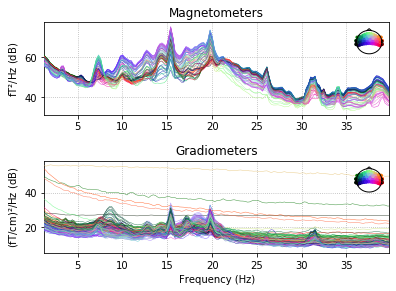

In [104]:
picks = mne.pick_channels(ch_names=new_ch, include=good_ch)
%matplotlib inline
traw= mne.io.read_raw_fif('data/mind004_050924_median01_raw.fif')
traw.info['sfreq']=500
data = new_samp.copy()
ch_names = new_ch.copy()
raw = mne.io.RawArray(data, traw.info)
raw.filter(1., 40., fir_design='firwin')
fig=raw.plot_psd(fmin=1., fmax=40., tmax=1400., average=False, picks=picks, spatial_colors=True);
fig.savefig(str(fname) +'PSD_all_chs.png') 

Opening raw data file data/mind004_050924_median01_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 49840 ... 1986479 =     27.799 ...  1107.979 secs
Ready.
Current compensation grade : 0
Creating RawArray with float64 data, n_channels=318, n_times=700000
Current compensation grade : 0
    Range : 0 ... 699999 =      0.000 ...  1399.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651

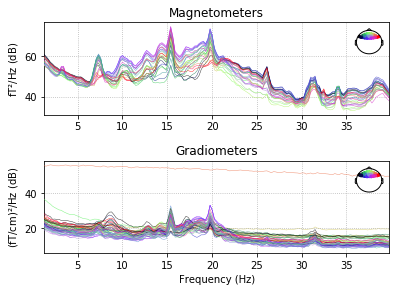

In [105]:
picks = mne.pick_channels(ch_names=new_ch, include=CO_picks)
%matplotlib inline
traw= mne.io.read_raw_fif('data/mind004_050924_median01_raw.fif')
traw.info['sfreq']=500
data = new_samp.copy()
ch_names = new_ch.copy()
raw = mne.io.RawArray(data, traw.info)
raw.filter(1., 40., fir_design='firwin')
fig=raw.plot_psd(fmin=1., fmax=40., tmax=1400., average=False, picks=picks, spatial_colors=True);
fig.savefig(str(fname) +'PSD_CO_chs.png') 

MI channels PSD

Opening raw data file data/mind004_050924_median01_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 49840 ... 1986479 =     27.799 ...  1107.979 secs
Ready.
Current compensation grade : 0
Creating RawArray with float64 data, n_channels=318, n_times=700000
Current compensation grade : 0
    Range : 0 ... 699999 =      0.000 ...  1399.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651

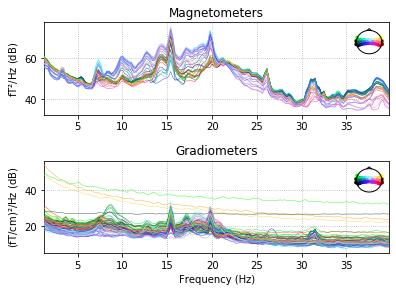

In [106]:
picks = mne.pick_channels(ch_names=new_ch, include=MI_picks)
%matplotlib inline
traw= mne.io.read_raw_fif('data/mind004_050924_median01_raw.fif')
traw.info['sfreq']=500
data = new_samp.copy()
ch_names = new_ch.copy()
raw = mne.io.RawArray(data, traw.info)
raw.filter(1., 40., fir_design='firwin')
fig=raw.plot_psd(fmin=1., fmax=40., tmax=1400., average=False, picks=picks, spatial_colors=True);
fig.savefig(str(fname) +'PSD_MI_chs.png') 